#Resolutions for all Regions

In [1]:
import sys
sys.path.append('/Users/demattia/Desktop/Notebooks')
import rootprint
import rootnotes
from array import array
# import LinearFitterHistograms

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors
import math
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [207]:
region = "9"

layers_list = []
if region == "1":
    layers_list = [5, 6, 7, 8, 9, 10]
elif region == "2":
    layers_list = [5, 6, 7, 8, 9, 11]
elif region == "3":
    layers_list = [5, 6, 7, 8, 11, 12]
elif region == "4":
    layers_list = [5, 6, 7, 11, 12, 13]
elif region == "5":
    layers_list = [5, 6, 11, 12, 13, 14]
elif region == "6":
    layers_list = [5, 6, 11, 12, 14, 15]
elif region == "7":
    layers_list = [5, 11, 12, 13, 14, 15]
elif region == "8":
    layers_list = [5, 11, 12, 13, 14, 15]
elif region == "9":
    layers_list = [5, 11, 12, 13, 14, 15]


f_name = "/linearFitterHistograms.root"

base_dir = "/Users/demattia/RemoteProjects/Test/NewConstants/ConstantsProduction/"

base_z = []
base_z.append(base_dir+"Combinations_Longitudinal/Region_"+region+"_")
base_z.append(base_dir+"Combinations_Longitudinal_Rz/Region_"+region+"_")
base_z.append(base_dir+"Combinations_Longitudinal_SecondOrder/Region_"+region+"_")
base_z.append(base_dir+"Combinations_Longitudinal_Rz_SecondOrder/Region_"+region+"_")
legend_names_z = ("First order (z)", "First order (Rz)", "Second order (z)", "Second order (Rz)")

# Low pT
base_low_pt = []
base_low_pt.append(base_dir+"Combinations_Transverse_SecondOrder_2_10/Region_"+region+"_")
base_low_pt.append(base_dir+"Combinations_Transverse_SecondOrder_2_15/Region_"+region+"_")
base_low_pt.append(base_dir+"Combinations_Transverse_Pz_2_10/Region_"+region+"_")
base_low_pt.append(base_dir+"Combinations_Transverse_Pz_2_15/Region_"+region+"_")
legend_names_low_pt = ("SecondOrder 2 < pT < 10", "SecondOrder 2 < pT < 15", "Pz: 2 < pT < 10", "Pz: 2 < pT < 15")

# High pT
base_high_pt = []
base_high_pt.append(base_dir+"Combinations_Transverse_SecondOrder_10_more/Region_"+region+"_")
base_high_pt.append(base_dir+"Combinations_Transverse_SecondOrder_15_more/Region_"+region+"_")
base_high_pt.append(base_dir+"Combinations_Transverse_Pz_10_more/Region_"+region+"_")
base_high_pt.append(base_dir+"Combinations_Transverse_Pz_15_more/Region_"+region+"_")
legend_names_high_pt = ("SecondOrder pT > 10", "SecondOrder pT > 15", "Pz: pT > 10", "Pz: pT > 15")


In [176]:
def fit(input_file_name, name):
    # print input_file_name
    input_file = TFile(input_file_name, "READ")
    h = input_file.FindObjectAny(name)
    h.Fit("gaus")
    fitResults = [0]*4
    try:
        fitResults[0] = h.GetFunction("gaus").GetParameter(1)
        fitResults[1] = h.GetFunction("gaus").GetParError(1)
        fitResults[2] = h.GetFunction("gaus").GetParameter(2)
        fitResults[3] = h.GetFunction("gaus").GetParError(2)
    except:
        pass
    h.SetName(input_file_name)
    return h, fitResults, input_file

In [177]:
def fitAndDraw(base_var, f_name, histo, layers_list):
    h = []
    h.append(fit(base_var+"All"+f_name, histo))
    for layer in layers_list:
        name = base_var+"Removed_"+str(layer)+f_name
        h.append(fit(name, histo))    
    fitResults = []
    for i in range(len(h)):
        fitResults.append(h[i][1])
    return h, fitResults

def fitAll(base_vars, f_name, histo, layers_list):
    h = []
    fitResults = []
    for base_var in base_vars:
        h_temp, f_temp = fitAndDraw(base_var, f_name, histo, layers_list)
        h.append(h_temp)
        fitResults.append(f_temp)
    return h, fitResults

In [178]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()

def plot(fitResults, index, y_label, layers_list, legend_names, y_min = 0, y_max = 0):
    N = 7
    value = []
    std = []
    for f in fitResults:
        value.append([v[index] for v in f])
        std.append([v[index+1] for v in f])
    bottomMeans = [0]*N
    width = 1.2       # the width of the bars
    colors = ['r', 'g', 'b', 'y']
    ind = []
    rects = []
    fig, ax = plt.subplots()
    for i in range(len(fitResults)):
        ind.append(np.linspace(i*width, 6*N+i*width, N))  # the x locations for the groups
        rects.append(ax.bar(ind[i], value[i], width, bottom = bottomMeans, color=colors[i], yerr=std[i]))

    # add some text for labels, title and axes ticks
    ax.set_ylabel(y_label)
    # ax.set_title('pT relative bias')
    ax.set_xticks(ind[2])
    xticklabels = ['All']
    for layer in layers_list:
        xticklabels.append('No layer '+str(layer))
    ax.set_xticklabels( xticklabels )
    ax.grid()
    if (y_min != y_max):
        ax.set_ylim([y_min, y_max])
    
    autolabel(rects[int(len(rects)/2)])

    ax.legend(rects, legend_names)

    return plt

#Low pT

##pT Bias and Resolution

In [120]:
pt_histo = "EstimatedParRelError_summary_charge/pt"
h, fitResults = fitAll(base_low_pt, f_name, pt_histo, layers_list)

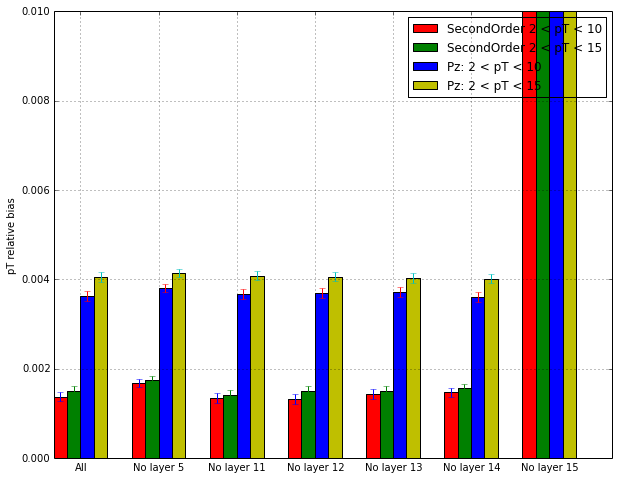

In [121]:
plt = plot(fitResults, 0, 'pT relative bias', layers_list, legend_names_low_pt, y_max = 0.01)
plt.show()

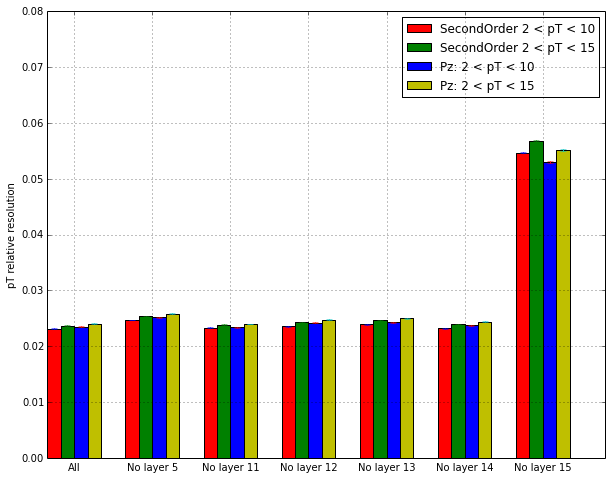

In [122]:
plt = plot(fitResults, 2, 'pT relative resolution', layers_list, legend_names_low_pt, y_max = 0.08)
plt.show()

In [123]:
# plt = plot(fitResults, 0, 'pT relative resolution', single_mode = True, y_min = -0.02, y_max = 0.02)
# plt.show()

##Phi0 Bias and resolution

In [124]:
phi0_histo = "EstimatedParError_summary_phi"
h, fitResults = fitAll(base_low_pt, f_name, phi0_histo, layers_list)

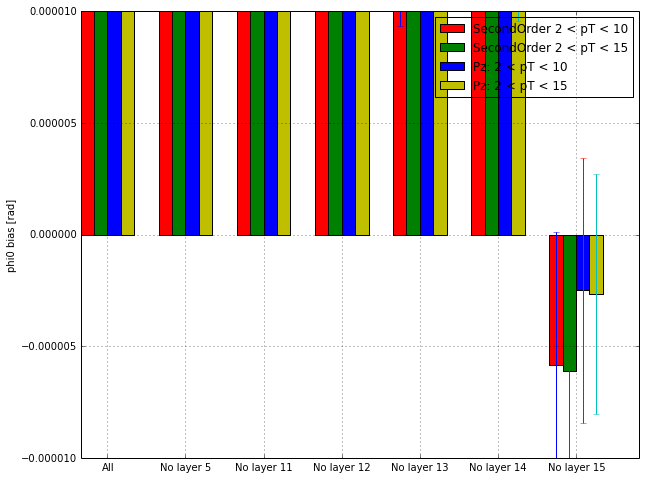

In [125]:
plt = plot(fitResults, 0, 'phi0 bias [rad]', layers_list, legend_names_low_pt, y_min = -0.00001, y_max = 0.00001)
plt.show()

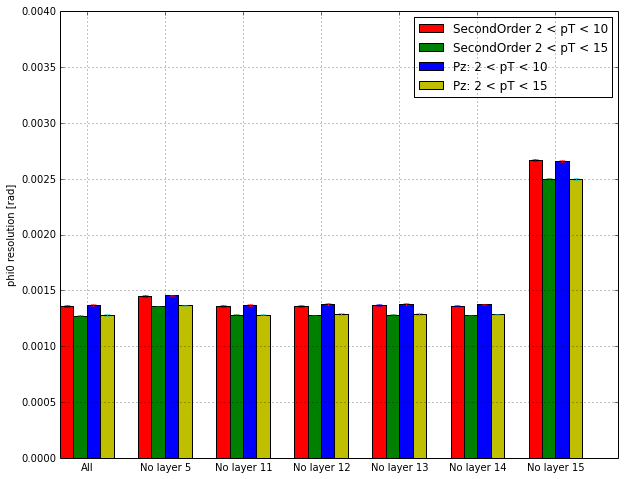

In [127]:
plt = plot(fitResults, 2, 'phi0 resolution [rad]', layers_list, legend_names_low_pt, y_max = 0.004)
plt.show()

#High pT

In [208]:
pt_histo = "EstimatedParRelError_summary_charge/pt"
h, fitResults = fitAll(base_high_pt, f_name, pt_histo, layers_list)

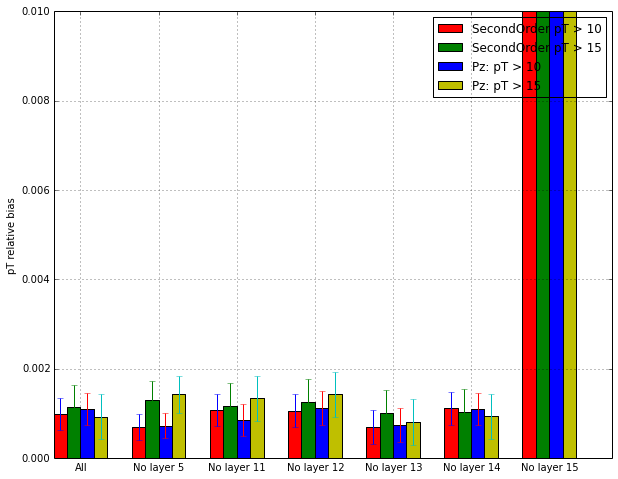

In [209]:
plt = plot(fitResults, 0, 'pT relative bias', layers_list, legend_names_high_pt, y_max = 0.01)
plt.show()

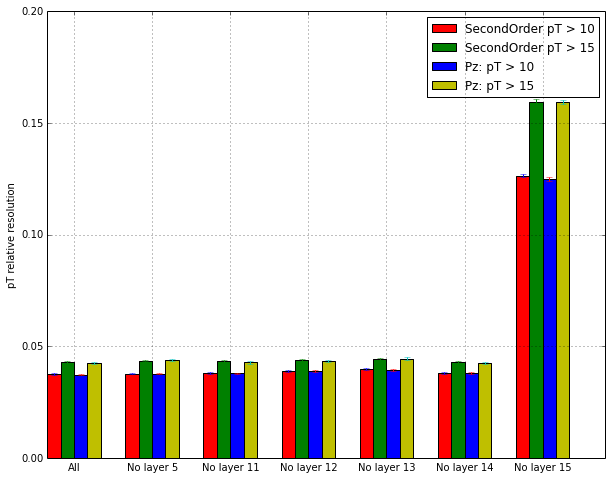

In [210]:
plt = plot(fitResults, 2, 'pT relative resolution', layers_list, legend_names_high_pt, y_max = 0.2)
plt.show()

In [211]:
phi0_histo = "EstimatedParError_summary_phi"
h, fitResults = fitAll(base_high_pt, f_name, phi0_histo, layers_list)

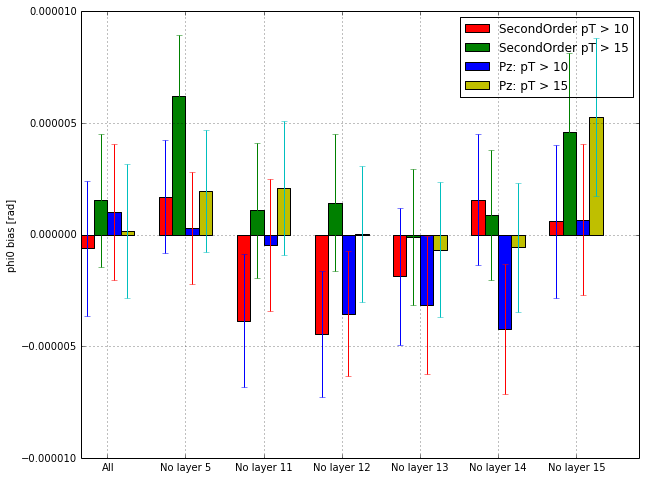

In [212]:
plt = plot(fitResults, 0, 'phi0 bias [rad]', layers_list, legend_names_high_pt, y_min = -0.00001, y_max = 0.00001)
plt.show()

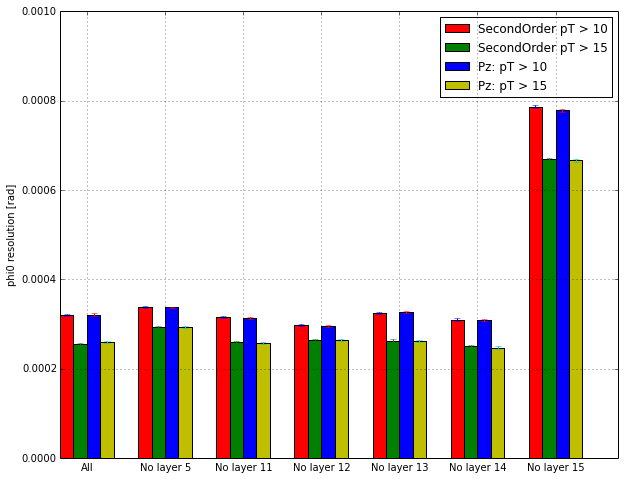

In [213]:
plt = plot(fitResults, 2, 'phi0 resolution [rad]', layers_list, legend_names_high_pt, y_max = 0.001)
plt.show()

## Z0 Bias and Resolution

In [254]:
z0_histo = "EstimatedParError_summary_z0"
h, fitResults = fitAll(base_z, f_name, z0_histo, layers_list)

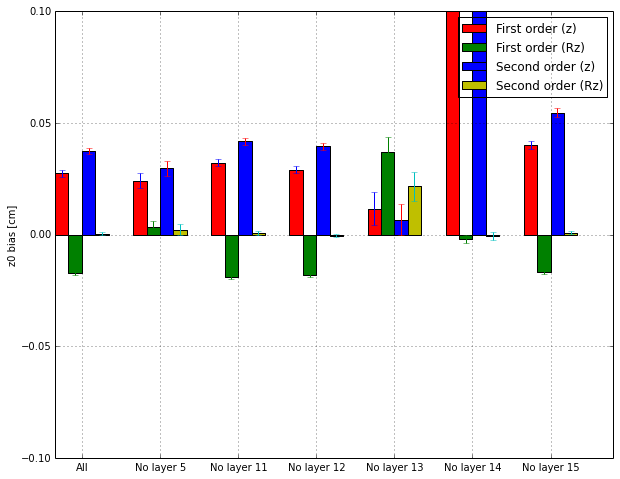

In [255]:
plt = plot(fitResults, 0, 'z0 bias [cm]', layers_list, legend_names_z, y_min = -0.1, y_max = 0.1)
plt.show()

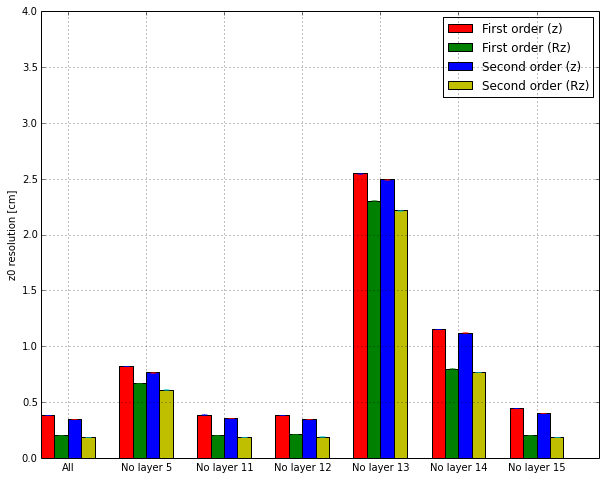

In [257]:
plt = plot(fitResults, 2, 'z0 resolution [cm]', layers_list, legend_names_z, y_max = 4.)

##CotTheta Bias and Resolution

In [258]:
cotTheta_histo = "EstimatedParError_summary_cotTheta"
h, fitResults = fitAll(base_z, f_name, cotTheta_histo, layers_list)

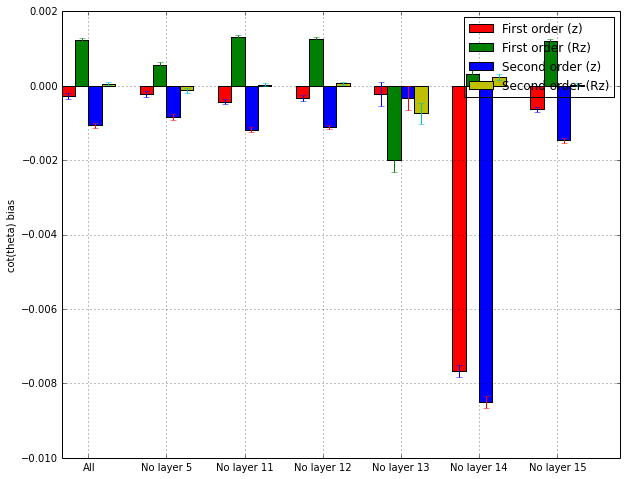

In [259]:
plt = plot(fitResults, 0, 'cot(theta) bias', layers_list, legend_names_z)
plt.show()

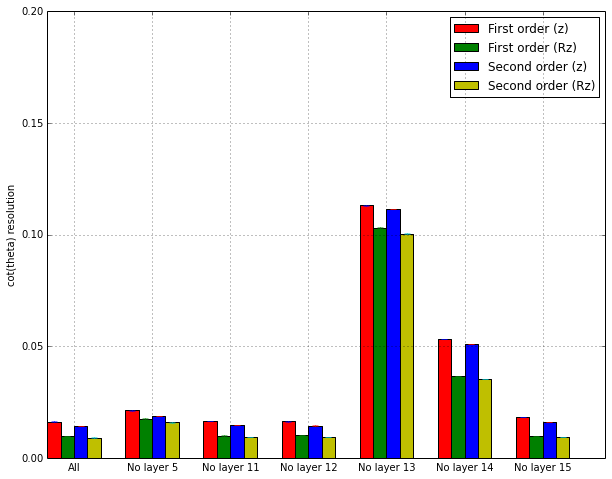

In [260]:
plt = plot(fitResults, 2, 'cot(theta) resolution', layers_list, legend_names_z, y_max = 0.2)
plt.show()